<a href="https://colab.research.google.com/github/mahimna/625-721-Project/blob/main/625_721_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 26.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
!pip install pandas-bokeh

In [3]:
!pip install rpy2==2.9.4

     |████████████████████████████████| 194 kB 34.8 MB/s 
  Created wheel for rpy2: filename=rpy2-2.9.4-cp37-cp37m-linux_x86_64.whl size=318242 sha256=e56e2c1b675887ce02eee4e6115dd22fe794b1d581bde99f7ce391d57f0469af
  Stored in directory: /root/.cache/pip/wheels/a3/82/4d/024c3738fd4a1bdef15e5d70deafb2059f9706906e46d56614
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.5
    Uninstalling rpy2-3.4.5:
      Successfully uninstalled rpy2-3.4.5


In [4]:
!pip install thresholdmodeling

In [5]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_bokeh
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages

base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages('POT') #installing POT package

from thresholdmodeling import thresh_modeling
from bokeh.models import NumeralTickFormatter, FixedTicker
from bokeh.plotting import figure, show, output_notebook

pandas_bokeh.output_notebook()

/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cloud.r-project.org/src/contrib/POT_1.1-7.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 1028906 bytes (1004 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.7/

In [6]:
spy = yf.Ticker("SPY")

In [7]:
def plot_close_values_and_returns(values, returns, percentile):
  index = int(len(values)*percentile / 100)
  values[0:index].plot_bokeh(kind='line')
  returns[1:index].plot_bokeh(kind='line')

In [8]:
def get_thresholds(returns, data_percentile, threshold_percentile):
  index = int(len(returns)*data_percentile / 100)
  thresh_modeling.MRL(returns[1:index], 0.05)
  thresh_modeling.Parameter_Stability_plot(returns[1:index], 0.05)
  precentile_threshold = np.percentile(hist_daily["Close_Returns"][1:index], threshold_percentile)
  print(precentile_threshold)
  return precentile_threshold

In [9]:
def estimate_parameters(returns, data_percentile, threshold):
  index = int(len(returns)*data_percentile / 100)
  vals = thresh_modeling.gpdfit(returns[1:index], threshold, 'mle')
  thresh_modeling.gpdpdf(hist_daily["Close_Returns"][1:index], threshold, 'mle', 'sturges', 0.05)
  thresh_modeling.gpdcdf(hist_daily["Close_Returns"][1:index], threshold, 'mle', 0.05)

In [10]:
def plot_returns_and_above_threshold_returns(returns, data_percentile, threshold):
  index = int(len(returns)*data_percentile / 100)
  above_threshold_df = returns[1:index][returns[1:index] > threshold]
  
  returns_histogram, returns_edges = np.histogram(returns[1:index], bins=30)
  returns_p = figure(title="Close Returns")
  returns_p.quad(top=returns_histogram, bottom=0, left=returns_edges[:-1], right=returns_edges[1:], line_color=None)

  returns_p.xaxis[0].formatter = NumeralTickFormatter(format="0.0")
  show(returns_p)

  above_threshold_np, above_threshold_edges = np.histogram(above_threshold_df, bins=30)
  above_threshold_p = figure(title="Above Threshold Returns")
  above_threshold_p.quad(top=above_threshold_np, bottom=0, left=above_threshold_edges[:-1], right=above_threshold_edges[1:], line_color=None)

  above_threshold_p.xaxis[0].formatter = NumeralTickFormatter(format="0.0")
  show(above_threshold_p) 


In [11]:
def find_cdf_of_max_value(returns, data_percentile, threshold, scale, shape):
  index = int(len(returns)*data_percentile / 100)
  max_value = max(returns[index:])
  cdf = 1-pow(1+(shape*(max_value-threshold))/scale, -1/shape)
  print(cdf)
  return cdf

In [21]:
hist_daily = spy.history(start="1993-02-01", end="2021-10-30")
hist_daily['Close_Returns'] = (hist_daily['Close'].shift(1) - hist_daily['Close'])/(hist_daily['Close'])*100

In [24]:
hist_weekly = spy.history(start="1993-02-01", end="2021-10-30", interval="1wk")
hist_weekly['Close_Returns'] = (hist_weekly['Close'].shift(1) - hist_weekly['Close'])/(hist_weekly['Close'])*100

In [31]:
plot_close_values_and_returns(hist_daily['Close'], hist_daily['Close_Returns'], 100)

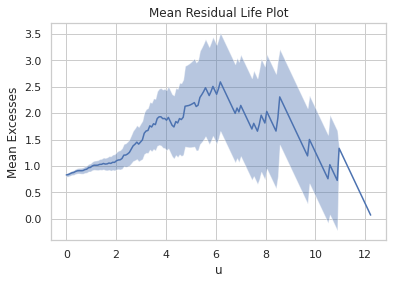

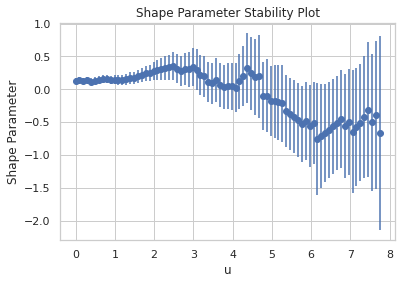

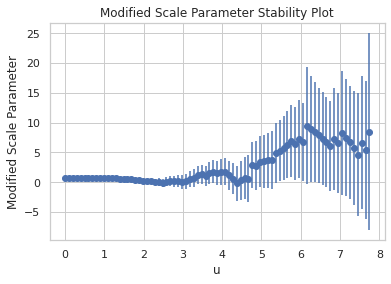

1.1935952253976445


In [94]:
percentile_threshold = get_thresholds(hist_daily["Close_Returns"], 100, 90)

Estimator: MLE 
 Deviance: 1448.52 
      AIC: 1452.52 

Varying Threshold: FALSE 

  Threshold Call: 1.19359522539764 
    Number Above: 726 
Proportion Above: 0.1 

Estimates
 scale   shape  
0.8623  0.1457  

Standard Error Type: observed 

Standard Errors
  scale    shape  
0.04619  0.03899  

Asymptotic Variance Covariance
       scale      shape    
scale   0.002133  -0.001113
shape  -0.001113   0.001521

Optimization Information
  Convergence: successful 
  Function Evaluations: 51 
  Gradient Evaluations: 9 


Estimator: MLE 
 Deviance: 1448.52 
      AIC: 1452.52 

Varying Threshold: FALSE 

  Threshold Call: 1.19359522539764 
    Number Above: 726 
Proportion Above: 0.1 

Estimates
 scale   shape  
0.8623  0.1457  

Standard Error Type: observed 

Standard Errors
  scale    shape  
0.04619  0.03899  

Asymptotic Variance Covariance
       scale      shape    
scale   0.002133  -0.001113
shape  -0.001113   0.001521

Optimization Information
  Convergence: successful 
  Functio

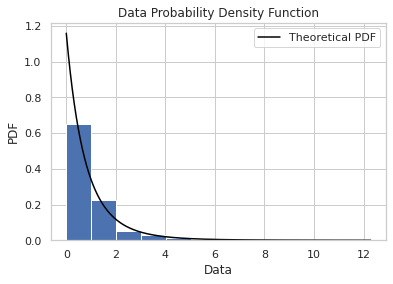

Estimator: MLE 
 Deviance: 1448.52 
      AIC: 1452.52 

Varying Threshold: FALSE 

  Threshold Call: 1.19359522539764 
    Number Above: 726 
Proportion Above: 0.1 

Estimates
 scale   shape  
0.8623  0.1457  

Standard Error Type: observed 

Standard Errors
  scale    shape  
0.04619  0.03899  

Asymptotic Variance Covariance
       scale      shape    
scale   0.002133  -0.001113
shape  -0.001113   0.001521

Optimization Information
  Convergence: successful 
  Function Evaluations: 51 
  Gradient Evaluations: 9 




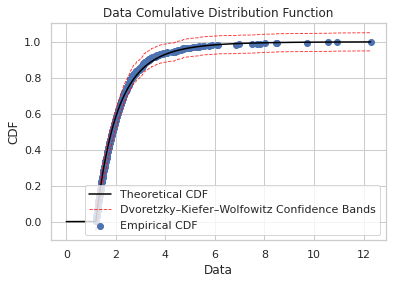

In [95]:
estimate_parameters(hist_daily['Close_Returns'], 100, percentile_threshold)

In [109]:
find_cdf_of_max_value(hist_daily["Close_Returns"][1:], 100, percentile_threshold, 0.8623, 0.1457)

ValueError: ignored

In [103]:
plot_returns_and_above_threshold_returns(hist_daily["Close_Returns"], 100, percentile_threshold)

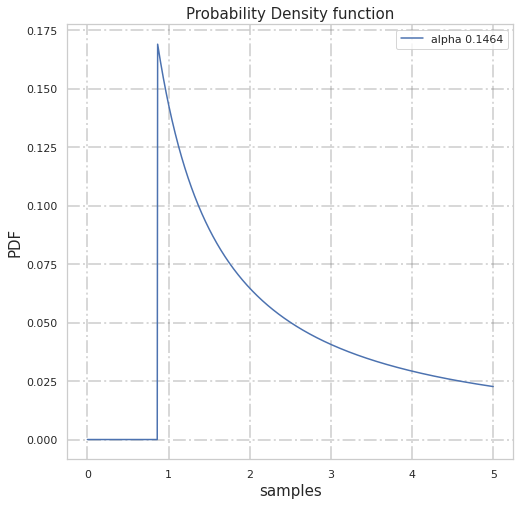

In [85]:
import matplotlib.pyplot as plt
from scipy.stats import pareto
x_m = 0.8616 #scale
alpha = [0.1464] #list of values of shape parameters
samples = np.linspace(start=0, stop=5, num=1000)
for a in alpha:
    output = np.array([pareto.pdf(x=samples, b=a, loc=0, scale=x_m)])
    plt.plot(samples, output.T, label='alpha {0}' .format(a))
plt.xlabel('samples', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

In [67]:
samples = np.linspace(start=0, stop=5, num=1000)
scale = 0.8624
shape = 0.1457
gpd = 1-pow(1+(shape*(samples-threshold))/scale, -1/shape)
gpd = np.where(gpd > 0,gpd,0)
gpd_df = pd.DataFrame(data=gpd, index=samples, columns=['CDF'])

In [68]:
gpd_df.plot_bokeh(kind='line')

Figure(id='3985', ...)